# Control for interaction between hand annotations and speech / non-speech fragments

In [7]:
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
import pympi
from scipy.stats import chi2_contingency

%matplotlib inline

In [8]:
# load elan annotations 
D = pympi.Elan.Eaf('../data/hand_presence_annotation_fragments.eaf')
tiers = ['hands_speech', 'hands_nonspeech']
assert all([i in D.get_tier_names() for i in tiers])

A = {}
for itier in tiers:
    temp = np.array(D.get_annotation_data_for_tier(itier)).astype(np.int32).T
    A[itier] = {}
    A[itier]['start'], A[itier]['end'], A[itier]['text'] = temp

# at 1000 Hz
for itier in tiers:
    s = np.argsort(A[itier]['start'])
    for k, v in A[itier].items():
        A[itier][k] = v[s]

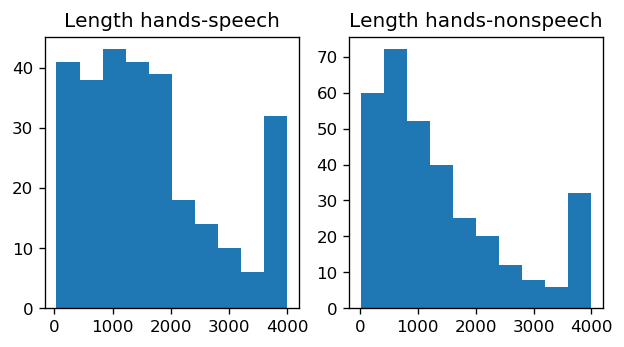

In [13]:
# ttest on average duration of annotation 
temp_spe, temp_non = [], []
temp_spe.append(A['hands_speech']['end'] - A['hands_speech']['start'])
temp_spe.append([1]*len(temp_spe[0]))
temp_non.append(A['hands_nonspeech']['end'] - A['hands_nonspeech']['start'])
temp_non.append([0]*len(temp_non[0]))

# histsograms
plt.figure(figsize=(6, 3), dpi=120)
plt.subplot(121)
plt.hist(temp_spe[0])
plt.title('Length hands-speech')
plt.subplot(122)
plt.hist(temp_non[0])
plt.title('Length hands-nonspeech')
plt.show()

In [10]:
# chi squared 2 x 2: speech presence/absence and hand presence/absence

def binarize_presence(x):
    x[x>0] = 1
    return x

temp_spe = binarize_presence(A['hands_speech']['text'].copy())
temp_non = binarize_presence(A['hands_nonspeech']['text'].copy())

cont_tab = np.array([[np.sum(temp_spe), temp_spe.shape[0]-np.sum(temp_spe)],
            [np.sum(temp_non), temp_non.shape[0]-np.sum(temp_non)]])
chi2, pval, dof, ex = chi2_contingency(cont_tab, correction=True)
print(chi2, pval)

0.9717840170272802 0.3242356528993436


In [11]:
# chi squared 2 x 2: speech presence/absence and hand movement/hand absence
def binarize_move(x):
    x[x==1] = 0
    x[x>0] = 1
    return x

temp_spe = binarize_move(A['hands_speech']['text'].copy())
temp_non = binarize_move(A['hands_nonspeech']['text'].copy())

cont_tab = np.array([[np.sum(temp_spe), temp_spe.shape[0]-np.sum(temp_spe)],
            [np.sum(temp_non), temp_non.shape[0]-np.sum(temp_non)]])
chi2, pval, dof, ex = chi2_contingency(cont_tab, correction=True)
print(chi2, pval)

0.10011452158596111 0.7516922469397134


In [12]:
# chi squared 2 x 3: speech presence/absence and hand movement/presence/absence
def split_three(x):
    x[x>2] = 2
    return x

temp_spe = split_three(A['hands_speech']['text'].copy())
temp_non = split_three(A['hands_nonspeech']['text'].copy())

cont_tab = np.array([[np.sum(temp_spe==2), np.sum(temp_spe==1), np.sum(temp_spe==0)],
            [np.sum(temp_non==2), np.sum(temp_non==1), np.sum(temp_non==0)]])
chi2, pval, dof, ex = chi2_contingency(cont_tab, correction=True)
print(chi2, pval)

1.3138744395544255 0.5184367632076006
